In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load Data Set
original_data = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/wisconsin_data.csv")
original_data.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
original_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#If you can see there are no missing data except for Unnamed: 32, select only the features without Unnamed 32

cleaned_data = original_data.drop('Unnamed: 32',axis = 1)
cleaned_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Check if the last columns is not included

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
cleaned_data.set_index('id', inplace = True)
cleaned_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
cleaned_data = cleaned_data.reset_index().drop('id',axis = 1)

In [ ]:
#check again the data to make sure it is already clean

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#Check the target classes (M= 'Malignant', B = 'Benign' -> Non- Cancerous)
cleaned_data['diagnosis'].unique()


array(['M', 'B'], dtype=object)

In [ ]:
#Replace diagnosis with the following values (M= 1, B = 0)
cleaned_data.replace(['M', 'B'], [1,0], inplace = True)
cleaned_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Add the validation data from a specific source (validation_data_cancer from the SVM folder)

validation_data = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/6d90a16510c5392af89e62ac85835b9e3d171dc7/CPE%20Electives%20(1%20-%203)/01.%20Lectures%20Notebook/56.%20Support%20Vector%20Machines/validation_data_cancer.csv')
validation_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,-1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
2,-1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
3,-1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
4,-1,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
5,-1,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,0.1769,...,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
6,-1,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
7,-1,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,...,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
8,-1,13.480,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.054390,0.1720,...,15.530,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710
9,-1,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [ ]:
#Insert New Data to the Original DataFrame
cleaned_data = pd.concat([cleaned_data, validation_data], axis = 0)

In [ ]:
#If you will notice the indexs of the validation data is wrong
cleaned_data.tail(12)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,1,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400
568,0,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
0,-1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
1,-1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
2,-1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
3,-1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
4,-1,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
5,-1,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,0.1769,...,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
6,-1,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
7,-1,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,...,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504


In [ ]:
#You can resolve the issue by resetting the index again
cleaned_data = cleaned_data.reset_index().drop('index', axis = 1)
cleaned_data.tail(12)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
567,1,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.152000,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400
568,0,7.760,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.000000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.00000,0.00000,0.2871,0.07039
569,-1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
570,-1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
571,-1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
572,-1,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
573,-1,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
574,-1,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.086320,0.1769,...,29.170,35.59,188.00,2615.0,0.14010,0.26000,0.31550,0.20090,0.2822,0.07526
575,-1,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
576,-1,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.028990,0.1565,...,14.990,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504


In [ ]:
X = cleaned_data.drop('diagnosis', axis = 1)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
#Scale teh data using scaler transform
scaled_features = scaler.transform(X)
scaled_features

array([[ 1.0897248 , -2.074043  ,  1.26382935, ...,  2.28382524,
         2.75756872,  1.94775225],
       [ 1.81952654, -0.35140013,  1.67859646, ...,  1.08020469,
        -0.23918582,  0.28746812],
       [ 1.57060192,  0.45980382,  1.55950492, ...,  1.94426478,
         1.15800444,  0.20745442],
       ...,
       [ 0.24111813,  1.38056693,  0.1443688 , ..., -1.2999019 ,
        -2.15769157, -1.60063278],
       [-0.1860139 ,  0.35956885, -0.1488428 , ...,  1.68353086,
        -0.14690327,  1.29208448],
       [-1.68069312, -0.56818739, -1.65555621, ..., -1.35068438,
         0.3355564 , -0.5421183 ]])

In [ ]:
#Convert the scaled features back to a DataFrame
scaled_features = pd.DataFrame(scaled_features, columns = cleaned_data.columns[1:])
scaled_features.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.089725,-2.074043,1.263829,0.977530,1.577061,3.300719,2.668281,2.536497,2.231191,2.267720,...,1.872350,-1.356030,2.293069,1.983425,1.312355,2.627182,2.120545,2.283825,2.757569,1.947752
1,1.819527,-0.351400,1.678596,1.898783,-0.832250,-0.483755,-0.020022,0.548546,0.003163,-0.866179,...,1.792085,-0.364039,1.527558,1.873435,-0.374394,-0.426454,-0.142594,1.080205,-0.239186,0.287468
2,1.570602,0.459804,1.559505,1.550125,0.947175,1.061914,1.373306,2.040349,0.946496,-0.394103,...,1.499839,-0.018147,1.340630,1.442207,0.530476,1.090164,0.862176,1.944265,1.158004,0.207454
3,-0.768724,0.257003,-0.593177,-0.765480,3.302087,3.420554,1.928115,1.453758,2.884550,4.930964,...,-0.282455,0.140115,-0.250624,-0.550346,3.403220,3.906650,2.000242,2.164070,6.055456,4.953822
4,1.740323,-1.150949,1.768942,1.816579,0.281501,0.546437,1.380872,1.430501,-0.007848,-0.559046,...,1.287857,-1.463714,1.331729,1.208261,0.222996,-0.309154,0.619645,0.723969,-0.864117,-0.392648


In [ ]:
#Set X (features) and y (Class Target)

X = scaled_features.iloc[:569,:]
y = cleaned_data.iloc[:569, 0]

In [ ]:
#Show
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.089725,-2.074043,1.263829,0.977530,1.577061,3.300719,2.668281,2.536497,2.231191,2.267720,...,1.872350,-1.356030,2.293069,1.983425,1.312355,2.627182,2.120545,2.283825,2.757569,1.947752
1,1.819527,-0.351400,1.678596,1.898783,-0.832250,-0.483755,-0.020022,0.548546,0.003163,-0.866179,...,1.792085,-0.364039,1.527558,1.873435,-0.374394,-0.426454,-0.142594,1.080205,-0.239186,0.287468
2,1.570602,0.459804,1.559505,1.550125,0.947175,1.061914,1.373306,2.040349,0.946496,-0.394103,...,1.499839,-0.018147,1.340630,1.442207,0.530476,1.090164,0.862176,1.944265,1.158004,0.207454
3,-0.768724,0.257003,-0.593177,-0.765480,3.302087,3.420554,1.928115,1.453758,2.884550,4.930964,...,-0.282455,0.140115,-0.250624,-0.550346,3.403220,3.906650,2.000242,2.164070,6.055456,4.953822
4,1.740323,-1.150949,1.768942,1.816579,0.281501,0.546437,1.380872,1.430501,-0.007848,-0.559046,...,1.287857,-1.463714,1.331729,1.208261,0.222996,-0.309154,0.619645,0.723969,-0.864117,-0.392648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.099567,0.725543,2.052298,2.332481,1.047384,0.224978,1.959639,2.324601,-0.312504,-0.928743,...,1.886757,0.123799,1.744156,1.997391,0.381129,-0.268991,0.671135,1.619863,-1.356290,-0.705480
565,1.695064,2.091536,1.608784,1.714533,0.102557,-0.012788,0.699969,1.265377,-0.217070,-1.056715,...,1.524535,2.057203,1.414808,1.480616,-0.690659,-0.390754,0.241894,0.728517,-0.527366,-0.971081
566,0.696537,2.051908,0.668372,0.572462,-0.845850,-0.033712,0.050716,0.105372,-0.811700,-0.893195,...,0.555182,1.383367,0.575119,0.420877,-0.809259,0.356399,0.332362,0.410179,-1.100490,-0.313746
567,1.828013,2.343289,1.974272,1.725871,1.534114,3.289307,3.315139,2.663118,2.150439,1.051983,...,1.946441,2.248096,2.293069,1.637744,1.435347,3.918125,3.211934,2.277762,1.925407,2.231134


In [ ]:
#Show y
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
#Train - Test Split Proper

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
#Show X_train
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
178,-0.318962,0.685915,-0.411255,-0.367783,-2.423426,-1.610957,-1.095658,-1.216862,-1.527459,-1.481868,...,-0.469740,0.551269,-0.567807,-0.478591,-2.243434,-1.397243,-1.266816,-1.599003,-0.975827,-1.412267
421,0.156257,-1.234867,0.254426,-0.000132,0.481919,1.512719,0.712579,0.363266,1.008896,1.606530,...,0.036547,-1.191242,0.201265,-0.128720,-0.049343,0.701288,0.243819,-0.059748,-0.114523,0.457497
57,0.161915,0.539059,0.144779,0.002136,1.240645,0.616816,0.514613,0.834348,0.792333,0.685129,...,0.326735,0.825372,0.248739,0.179075,0.196641,1.118852,0.420905,1.040791,1.295619,1.419884
514,0.258090,-0.048364,0.215002,0.129694,-0.301858,-0.344329,-0.171838,-0.144510,-0.918146,-0.513544,...,0.267051,0.394639,0.192364,0.146777,-0.339253,-0.276641,0.073951,-0.041558,-0.996874,-0.794939
548,-1.260067,0.014574,-1.271999,-1.050077,-0.820082,-1.022818,-0.821091,-1.016258,-0.848406,-0.058532,...,-1.101569,-0.008358,-1.133929,-0.905629,-0.545704,-1.007474,-0.855269,-1.156347,-0.559746,-0.258181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,-0.386851,2.366599,-0.438358,-0.420223,-0.973974,-1.174228,-0.863962,-0.877362,-0.998898,-0.908836,...,-0.496495,1.690101,-0.570180,-0.503208,-0.391964,-0.937731,-0.888810,-0.754331,-0.794500,-1.056095
393,2.113710,0.699902,2.150856,2.128388,1.455378,1.990153,2.427444,2.771651,1.287858,0.468998,...,2.047287,0.505585,1.919214,2.091668,0.785246,2.028568,2.088785,1.932138,1.506088,0.936468
75,0.546617,0.086836,0.495894,0.457944,-0.335500,-0.377236,0.116033,0.450609,-0.048224,-1.258627,...,0.717770,-0.176409,0.637428,0.593718,0.776461,-0.312341,0.056146,0.564800,-0.401085,-1.109993
337,1.310363,0.501763,1.267936,1.235481,-0.372720,0.687195,0.220816,0.309000,0.520712,-0.274663,...,1.699472,1.424156,1.595801,1.728529,0.767675,1.461191,0.924734,1.365193,1.264858,0.825338


In [ ]:
#Show
y_train

178    0
421    0
57     1
514    1
548    0
      ..
552    0
393    1
75     1
337    1
523    0
Name: diagnosis, Length: 398, dtype: int64

In [ ]:
#Create a Support Vector Machine Classifier

model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
#Predict on X_Test
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

<Axes: >

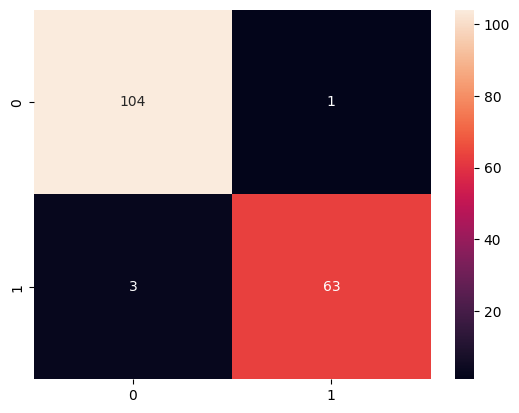

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd')

In [ ]:
#Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.98      0.95      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
#Can the model be improved using Grid Search?

from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 1.5], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 1.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
#Identify the Best Hyperparameters
grid.best_params_

{'C': 0.05, 'kernel': 'linear'}

In [ ]:
#Based on the Identified best_params_ -> remodel the SVM and supply the best hyperparameters
#Create another instance of Support Vector Machine Classifier
model = SVC(kernel = 'linear', C = 0.05)
model.fit(X_train, y_train)

SVC(C=0.05, kernel='linear')

In [ ]:
#Predict on X_test again
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

<Axes: >

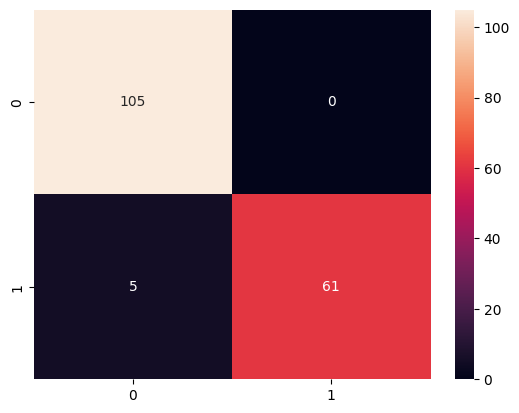

In [ ]:
#Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'd')

In [ ]:
#Classification Report (As you can see, the accuracy falls down by -1%)
#sometimes it is better to have 100% accuracy on 1 class, but this is not always the case
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       105
           1       1.00      0.92      0.96        66

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
validation_feature = scaled_features.iloc[569:,:]
y_predict = model.predict(validation_feature)

unseen_data = pd.concat([validation_feature, pd.DataFrame(y_predict, index = list(range(569,579)), columns = ['diagnosis'])], axis = 1)
unseen_data[['radius_mean','symmetry_mean', 'diagnosis']]

,radius_mean,symmetry_mean,diagnosis
569,1.819527,0.003163,1
570,1.570602,0.946496,1
571,-0.169042,0.271114,0
572,-0.299161,0.572100,0
573,-1.310701,0.014175,0
574,1.986419,-0.154671,1
575,-0.313305,-1.263178,0
576,0.241118,-0.903464,0
577,-0.186014,-0.334528,1
578,-1.680693,-0.154671,0
